# Exploratory crypto-data analysis

### About this notebook

The price data for all individual coins from the dataset were mainly obtained from CryptoCompare, the coin prices for comparing the price-value differences on various exchanges were retrieved from COINBASE, BITSTAMP, ITBIT and KRAKEN and then concatenated into a master file.


## 1. Import of basic libraries

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import quandl
import datetime
import statsmodels.api as sm
from scipy import stats

import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

D:\Programme\Anaconda\Neuer Ordner\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df_crypto = pd.read_csv('crypto_20_test.csv')

In [3]:
df_crypto['time'] =  pd.to_datetime(df_crypto['time'], format='%Y-%m-%d')

In [4]:
df_crypto.set_index('time', inplace=True)

In [5]:
df_crypto = df_crypto[(df_crypto.index >= '2016-01-01')]

## 2. Visualizing

### 2.1 Visualizing crypto-values

In [6]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = True
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [7]:
df_scatter(df_crypto, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)')

In [8]:
df_scatter(df_crypto, 'Cryptocurrency Prices (USD) - Log Scale', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')

### 2.2 Plot the Bitcoin price-difference between exchanges

The nature of Bitcoin exchanges is that the pricing is determined by supply and demand, hence no single exchange contains a true "master price" of Bitcoin. To solve this issue, along with that of down-spikes we will pull data from three more major Bitcoin exchanges to calculate an aggregate Bitcoin price index. [1]

In [9]:
btc_usd_datasets = pd.read_csv("btc_usd_datasets.csv")
btc_usd_datasets_close = pd.read_csv("btc_usd_datasets_close.csv")

In [10]:
btc_usd_datasets['Date'] =  pd.to_datetime(btc_usd_datasets['Date'], format='%Y-%m-%d')

In [11]:
btc_usd_datasets.set_index('Date', inplace=True)

In [12]:
btc_usd_datasets.tail()

KRAKEN     COINBASE     BITSTAMP        ITBIT  \
Date                                                             
2018-11-17  5487.019205  5485.641276  5485.905211  5492.647728   
2018-11-18  5554.570270  5548.435793  5546.607625  5543.471405   
2018-11-19  5082.254570  5064.234802  5090.807531  5088.958240   
2018-11-20  4463.861384  4459.862670  4458.857544  4505.747181   
2018-11-21  4363.074794  4368.629732  4356.297393  4369.868313   

            avg_btc_price_usd  
Date                           
2018-11-17        5487.803355  
2018-11-18        5548.271273  
2018-11-19        5081.563786  
2018-11-20        4472.082195  
2018-11-21        4364.467558

In [13]:
# Plot the average BTC price [1]
btc_trace = go.Scatter(x=btc_usd_datasets.index, y=btc_usd_datasets['avg_btc_price_usd'])
data = [btc_trace]
layout = go.Layout(
    title='Bitcoin Average Price in USD',
    xaxis=dict(
        title='Time',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Average Weighted Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [14]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = True
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

In [15]:
# Plot the prices from each exchanger + average price for comparisons
df_scatter(btc_usd_datasets, 'Bitcoin Price (USD) By Exchange')

### 2.3 Plot the top 10 cryptocurrency with the highest market cap

In [16]:
url = "https://api.coinmarketcap.com/v1/ticker/?limit=10"

In [17]:
data = pd.read_json(url)
df = pd.DataFrame(data)

In [18]:
market_cap_raw = df[['id','market_cap_usd']]
market_cap_raw

id  market_cap_usd
0       bitcoin     59295883649
1        ripple     12258921844
2      ethereum      9052325657
3       stellar      2222168886
4        tether      1878683523
5  bitcoin-cash      1778035366
6    bitcoin-sv      1738629816
7           eos      1571766366
8      litecoin      1428748046
9          tron       873746049

In [25]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')


#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 coins with the highest market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = market_cap_raw.set_index('id')

# Calculating market_cap_perc
cap10 = cap10.assign(cap_perc = lambda x: cap10.market_cap_usd / cap10.market_cap_usd.sum() * 100)

cap10.round(2)

# Plotting the barplot with the title defined above 
#ax = cap10['cap_perc'].plot.bar(title=TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
#ax.set(ylabel=TOP_CAP_YLABEL)

market_cap_usd  cap_perc
id                                    
bitcoin          59295883649     64.38
ripple           12258921844     13.31
ethereum          9052325657      9.83
stellar           2222168886      2.41
tether            1878683523      2.04
bitcoin-cash      1778035366      1.93
bitcoin-sv        1738629816      1.89
eos               1571766366      1.71
litecoin          1428748046      1.55
tron               873746049      0.95

## 3. Normality-testing

A large number of important financial models, like the mean-variance portfolio theory and the capital asset pricing model (CAPM), rest on the assumption that returns of securities are normally distributed; therefore, this notebook presents some
approaches to test a given time series for normality of returns. Python provides efficient statistical and graphical tools to test whether time series data is normally distributed or not.

### 3.1 Visualize Log Returns

Transformation of **returns** equation to **log returns** equation:

$$
r_{i} = \frac{p_i - p_j}{p_j}
$$

$$
r_i = \frac{p_i}{p_j} - \frac{p_j}{p_j}
$$

$$
1 + r_i = \frac{p_i}{p_j}
$$


$$
log(1+r_i) = log(\frac{p_i}{p_j})
$$

$$
log(1+r_i) = log(p_i) - log(p_j)
$$

Now, we apply the log returns equation to closing prices of cryptocurrencies, which can be interpreted as the percentage change: 

In [26]:
log_returns = df_crypto.apply(lambda x: np.log(x) - np.log(x.shift(1))) 
log_returns = log_returns.dropna()

In [27]:
log_returns.head()

BTC       XRP       ETH      DOGE       LTC       BTB  \
time                                                                     
2016-01-02 -0.000622 -0.070618  0.037023 -0.063058  0.000000  0.028371   
2016-01-03 -0.006987  0.014528  0.005536  0.000000 -0.005747  0.124752   
2016-01-04  0.006065 -0.019418 -0.010471 -0.125952  0.005747 -0.124752   
2016-01-05 -0.004904 -0.019803 -0.007820  0.172203 -0.008633 -0.007018   
2016-01-06 -0.000882  0.000000  0.007820  0.022347 -0.002894  0.000000   

              BITCNY       XMR     BLOCK       XWC       DCR       NXT  \
time                                                                     
2016-01-02 -0.000528 -0.166067  0.165570 -0.000549 -0.000922  0.038173   
2016-01-03 -0.006891  0.058064 -0.043873  0.225556 -0.007407 -0.046535   
2016-01-04  0.005834 -0.036558  0.015504 -0.114012  0.006485  0.023301   
2016-01-05 -0.004771  0.000000 -0.073276  0.076525 -0.004627 -0.000789   
2016-01-06 -0.001063  0.000000 -0.044508 -0.377218 -0.000928  0.010053   

                 FCT      DASH      MAID       BCN       BTS        SC  \
time                                                                     
2016-01-02  0.134192 -0.058269  0.021979 -0.000768 -0.010726 -0.000461   
2016-01-03 -0.044526 -0.068993  0.022835  0.147319 -0.008194 -0.007404   
2016-01-04 -0.067068 -0.036368  0.031375  0.005952 -0.006782 -0.217008   
2016-01-05  0.017193  0.091937 -0.014258  0.128822 -0.005042 -0.004627   
2016-01-06  0.010435 -0.055570  0.155642 -0.134443 -0.032027 -0.001160   

                 DGB      MONA  
time                            
2016-01-02 -0.000768  0.010097  
2016-01-03 -0.006942 -0.007771  
2016-01-04 -0.027463  0.119533  
2016-01-05  0.061700  0.004702  
2016-01-06 -0.034237  0.111935

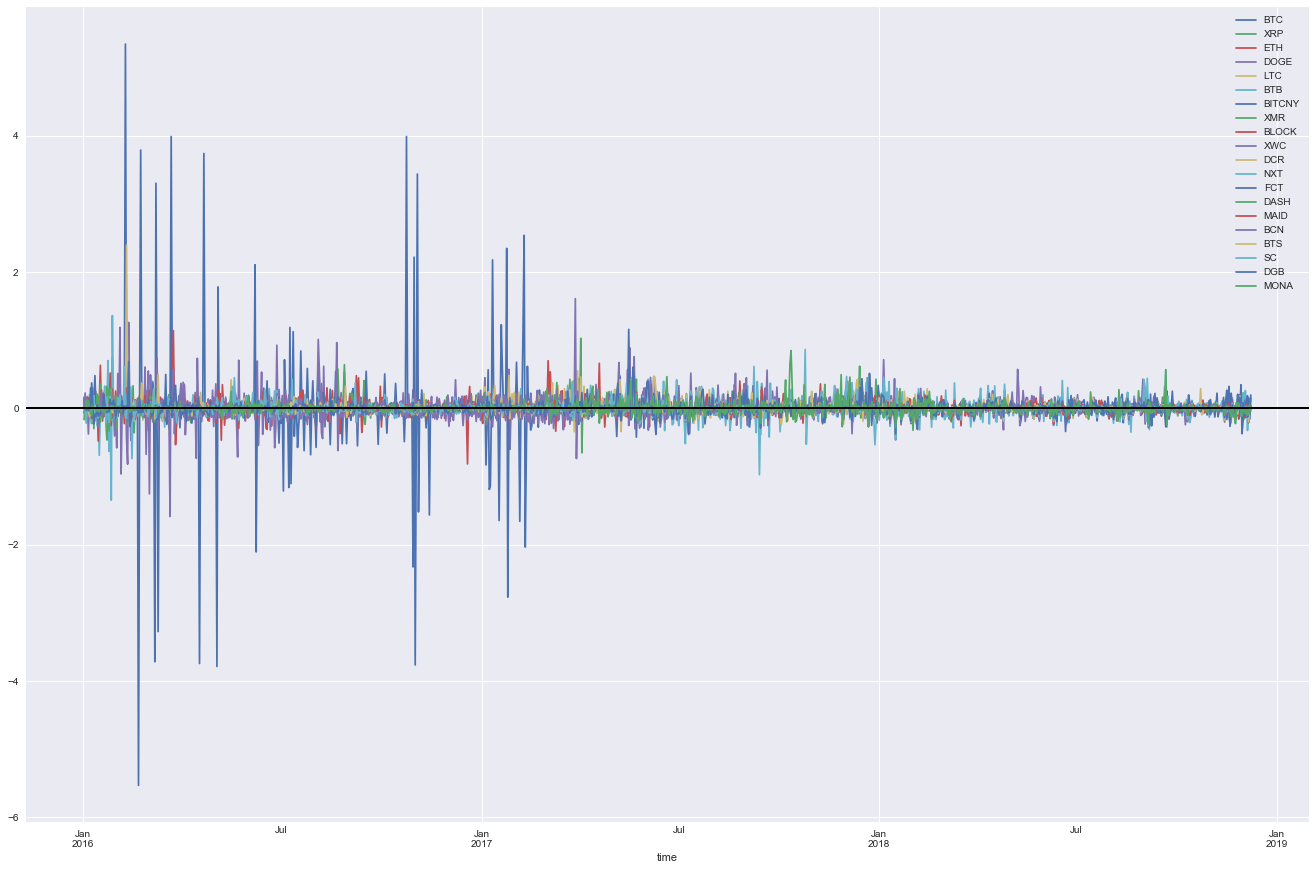

In [40]:
log_returns.plot(figsize=(23, 15)).axhline(color='black', linewidth=2)
plt.show()

### 3.2 Are log returns normally distributed?

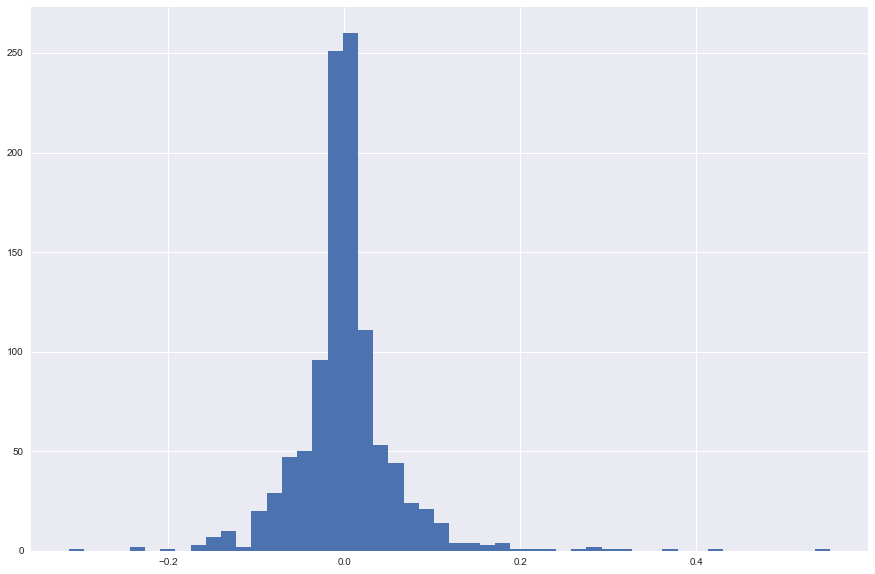

In [44]:
log_returns['LTC'].hist(bins=50, figsize=(15, 10))

### 3.2.1 Measures of Shape: Skewness and Kurtosis

### Skewness

Skewness is the degree of distortion or deviation from the symmetrical bell curve that is a key characteristic of a normal distribution. Skewness can be seen as a measure to calculate lack of symmetry in data distribution. [3]

Skewness helps to identify extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0. There are two types of Skewness: Positive and Negative

#### Positive Skewness

Positive Skewness is present in a distribution when the tail on the right side of the distribution is longer (or fatter - as it is normally called). The mean and median will be greater than the mode.

#### Negative Skewness
Negative Skewness is present in a distribution when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

This behavior is shown in the images below:

![title](skew1.jpeg)


### Kurtosis

Kurtosis tells the height and sharpness of the central peak, relative to that of a standard bell curve. [4]

Kurtosis measures whether your dataset is heavy-tailed or light-tailed compared to a normal distribution. Data sets with high kurtosis have heavy tails and more outliers and data sets with low kurtosis tend to have light tails and fewer outliers. [5]

![title](kurt2.jpg)

#### Mesokurtic (Kurtosis = 3)

This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard normal distribution has a kurtosis of three.

#### Leptokurtic (Kurtosis > 3)

Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers. 
Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.

#### Platykurtic: (Kurtosis < 3) 

Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.
The reason for this is because the extreme values are less than that of the normal distribution.


In [34]:
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def print_statistics(array):
    ''' Prints selected statistics. 
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''

    sta = scs.describe(array)
    print ("%14s %15s" % ('statistic', 'value'))
    print (30 * "-")
    print ("%14s %15.5f" % ('size', sta[0]))
    print ("%14s %15.5f" % ('min', sta[1][0]))
    print ("%14s %15.5f" % ('max', sta[1][1]))
    print ("%14s %15.5f" % ('mean', sta[2]))
    print ("%14s %15.5f" % ('std', np.sqrt(sta[3])))
    print ("%14s %15.5f" % ('skew', sta[4]))
    print ("%14s %15.5f" % ('kurtosis', sta[5]))

In [36]:
# normal-distribution if kurtosis = 3 and skewness = 0

symbols = df_crypto.columns

for sym in symbols:
    print ("\nResults for symbol %s" % sym)
    print (30 * "-")
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol BTC
------------------------------
     statistic           value
------------------------------
          size      1072.00000
           min        -0.18917
           max         0.22762
          mean         0.00194
           std         0.04090
          skew        -0.22579
      kurtosis         4.11301

Results for symbol XRP
------------------------------
     statistic           value
------------------------------
          size      1072.00000
           min        -0.65299
           max         1.02799
          mean         0.00376
           std         0.08488
          skew         2.46425
      kurtosis        29.15495

Results for symbol ETH
------------------------------
     statistic           value
------------------------------
          size      1072.00000
           min        -0.31010
           max         0.38299
          mean         0.00430
           std         0.06686
          skew         0.26280
      kurtosis         3.6631

On the chart below, we plot the distribution of BTC log returns. We also estimate parameters for normal distribution and plot estimated normal distribution with a blue line.

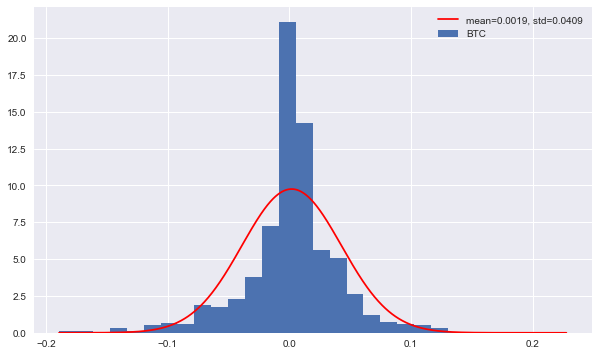

In [46]:
values = log_returns['BTC']
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, normed=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

### 3.2.2 Quantile-Quantile plots (QQ plots)

Comparing a frequency distribution (histogram) with a theoretical pdf is not the only way to graphically “test” for normality. So-called **quantile-quantile plots (qq plots)** are also well suited for this task. Here, sample quantile values are compared to theoretical quantile values. For normally distributed sample data sets the absolute majority of the quantile values (dots) should lie on a straight line as shown the picture below. [6]

![title](qq_plot.png)

Text(0.5,1,'BTC')

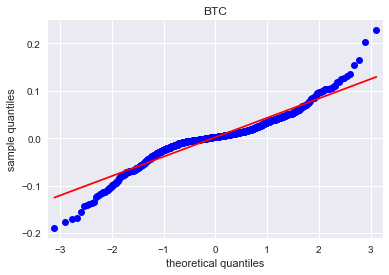

In [62]:
sm.qqplot(log_returns['BTC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title("BTC")

Text(0.5,1,'LTC')

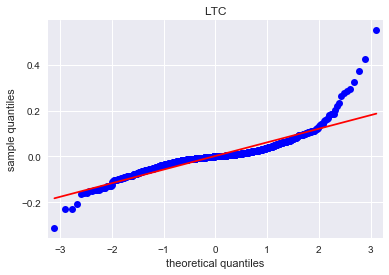

In [65]:
sm.qqplot(log_returns['LTC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title("LTC")

Text(0.5,1,'DCR')

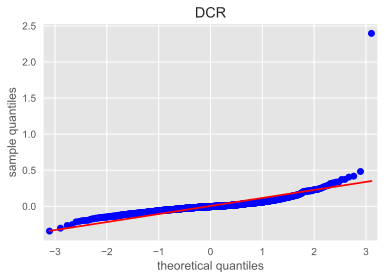

In [94]:
sm.qqplot(log_returns['DCR'].dropna(), line='s')
#sm.qqplot(log_returns.dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title("DCR")

Text(0.5,1,'FCT')

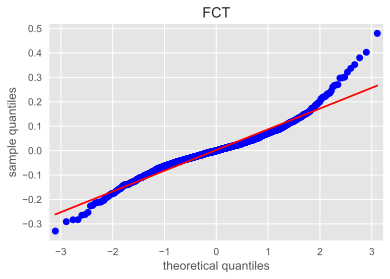

In [95]:
sm.qqplot(log_returns['FCT'].dropna(), line='s')
#sm.qqplot(log_returns.dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')
plt.title("FCT")

### 3.2.3 Pearson Correlation Heatmap with log returns

**Correlation Analysis**

Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables. This particular type of analysis is useful when a researcher wants to establish if there are possible connections between variables. [7]


The correlation coefficient of two variables $X$ and $Y$ is defined as

$$r = \frac{Cov(X,Y)}{std(X)  std(Y)}$$

where $Cov$ is the covariance and $std$ is the standard deviation.



If correlation is found between two variables, it means that when there is a systematic change in one variable, there is also a systematic change in the other; the variables alter together over a certain period of time. If there is correlation found, depending upon the numerical values measured, this can be either positive or negative.

Positive correlation exists if one variable increases simultaneously with the other, i.e. the high numerical values of one variable relate to the high numerical values of the other.

Negative correlation exists if one variable decreases when the other increases, i.e. the high numerical values of one variable relate to the low numerical values of the other.

Pearson’s coefficient is the measurement of correlation and ranges (depending on the correlation) between +1 and -1. A value of +1 indicates the strongest positive correlation possible, and -1 indicates the strongest negative correlation possible. Therefore the closer the coefficient to either of these numbers the stronger the correlation of the data it represents. A correlation of 0 indicates no correlation between the two variables. 

#### Why use Correlation Coefficients?

- Identify similar price behaviour of coins/stocks in the past

<break>

- Risk management: Diversify by choosing uncorrelated coins/stocks. Hence, a diversified portfolio would have various correlation coefficients, i.e including coins with a negative correlation coefficient into the portfolio can reduce the variance and therefore the risk

<break>

- Allow a useful reallocation of portfolio assets over time.

In [67]:
# split dataset to 4 datasets by year (2015,2016,2017,2018)
combined_df2018 = df_crypto[df_crypto.index.year == 2018]
combined_df2017 = df_crypto[df_crypto.index.year == 2017]
combined_df2016 = df_crypto[df_crypto.index.year == 2016]

In [68]:
# Calculate the pearson correlation coefficients for cryptocurrencies in 2015
df_crpyto16 = combined_df2016.pct_change().corr(method='pearson')
df_crpyto17 = combined_df2017.pct_change().corr(method='pearson')
df_crpyto18 = combined_df2018.pct_change().corr(method='pearson')

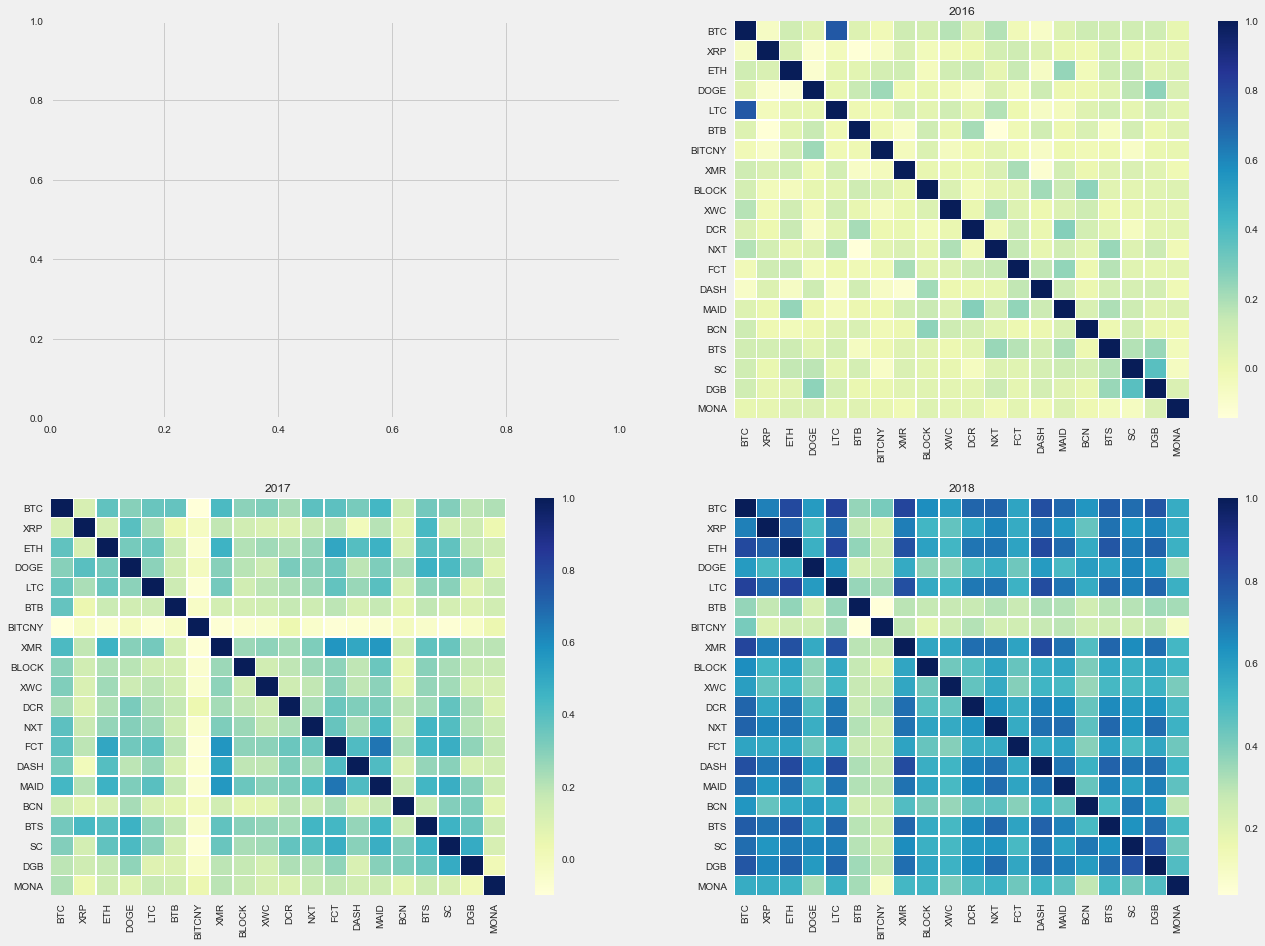

In [73]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-notebook')

f,ax = plt.subplots(2, 2,figsize=(20, 15))


sns.heatmap(combined_df2016.pct_change().corr(), annot=False, linewidths=.5, fmt= '.2f',ax=ax[0,1],cmap="YlGnBu")

sns.heatmap(combined_df2017.pct_change().corr(), annot=False, linewidths=.5, fmt= '.2f',ax=ax[1,0],cmap="YlGnBu")

sns.heatmap(combined_df2018.pct_change().corr(), annot=False, linewidths=.5, fmt= '.2f',ax=ax[1,1],cmap="YlGnBu")


ax[0,1].set_title('2016')
ax[1,0].set_title('2017')
ax[1,1].set_title('2018')

plt.show()

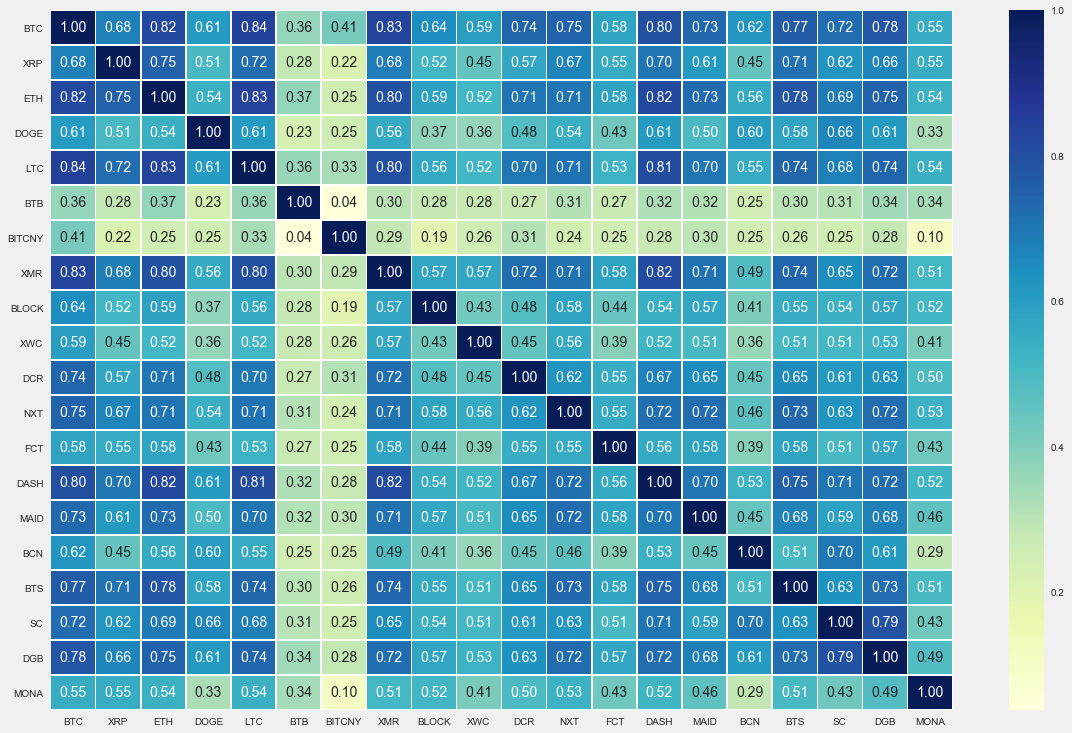

In [70]:
f,ax = plt.subplots(figsize=(18, 12))
sns.heatmap(combined_df2018.pct_change().corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax,cmap="YlGnBu")
plt.show()

### 3.2.4 Boxplots

A boxplot which can also be referred to as a box and whiskers plot is a plot which can be used to display the spread of a set of data. A short overview and description of the various terminology on boxplots can be seen on the figure and text below. [8][9]

![title](BoxPlot_1.png)

### Explanation of terminogy


**Quartiles** are the values that divide a list of numbers into quarters. The quartiles can also be refered to as special percentiles. For example the first quartile is also the 25th percentile. 25% of the data will be less than the 25th percentile and 75% of the data will be more than the 25th percentile. The advantages of comparing quartiles is that they are not influenced by outliers.

**Percentile** - This is a measure used in statistics indicating the value below which a given percentage of observations in a dataset falls. For example, the 20th percentile is the value below which 20% of the observations may be found.

**Minimum** - This is the lowest value in the dataset.

**Maximum** - This is the highest value in the dataset.

**Median** - The median is the middle value in a (sorted) data series.

**Interquartile range** - This is the middle 50% of values. As a measure of spread, the interquartile range is calculated by subtracting the 3rd Quartile for from the first (Q3 - Q1)

**1st quartile (Q1)** - Twenty-five percent of the data will also fall below the upper quartile. This is located between the bottom of the box and the lower whisker.

**3rd quartile (Q3)** Seventy-five percent of the data will fall below the upper quartile. This is located between the end of the box and the upper whisker.

**Whiskers** - Shows the entire spread of the data. The whiskers display the highest (upper whisker) and lowest points (lower whisker) of the box plot.

**Outliers** - In implementations where the whiskers do not represent the maximum and minimum values of the dataset, outliers are values that lie beyond the range between the two whiskers and are plotted seperately.

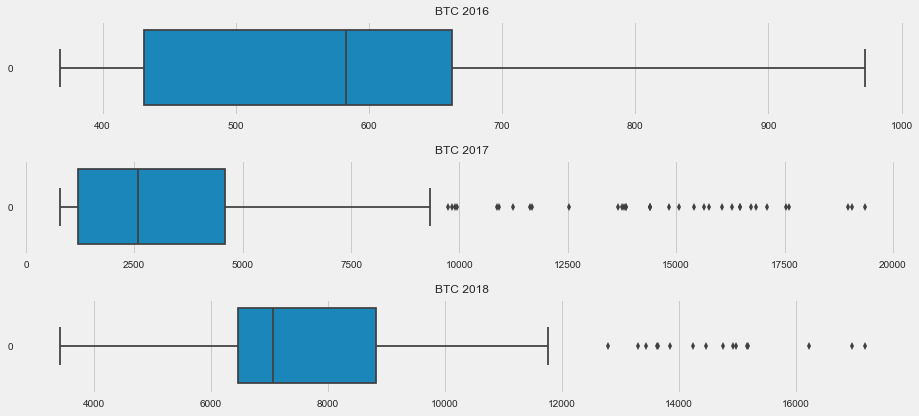

In [72]:
fig, axs = plt.subplots(nrows=3,figsize=(13, 6))
sns.boxplot(data = combined_df2016['BTC'], ax=axs[0],orient="h").set_title('BTC 2016')
sns.boxplot(data = combined_df2017['BTC'], ax=axs[1],orient="h").set_title('BTC 2017')
sns.boxplot(data = combined_df2018['BTC'], ax=axs[2],orient="h").set_title('BTC 2018')
fig.tight_layout()
plt.show()

## References

[1] https://blog.patricktriest.com/analyzing-cryptocurrencies-python/

[2] https://blog.patricktriest.com/analyzing-cryptocurrencies-python/

[3] https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

[4] https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

[5] https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa

[6] Python for Finance - Analzye big financial data, Yves Hilpisch, O’Reilly Media

[7] https://numex-blog.com/crypto-portfolio-optimization-part-i-correlation-matrix/

[8] http://mathworld.wolfram.com/Box-and-WhiskerPlot.html

[9] https://github.com/davesheils/Boxplots/blob/master/Fundamentals%20of%20Data%20Analysis%20-%20Project%20Nov-Dec%202018.ipynb
